In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Данные константы
k = 0.011  # (Вт/см/K)
c = 1.6  # (Дж/см3/K)
alpha = 0.5  # (Вт/см/K)
l = 0.5  # длина цилиндра
radius = 4  # радиус (см)
beta = 0.008  # (1/см)
u0 = 0  # (С)
t = 180  # время наблюдения (c)

In [3]:
# Задаем число отсчетов и шаги
num_m = 100
num_i = 100
tau = t/num_m # шаг по времени
r_arr = np.linspace(0,l,num_i) # массив точек распредленных [0,R]
t_arr = np.linspace(0,t, num_m)
h = radius/num_i # шаг по координате r
w = np.zeros((num_i, num_m))

In [4]:
import scipy.optimize
def bessel(x):
    return scipy.special.jv(0,x)
res = scipy.optimize.root(bessel, 2.3) # нахождение нуля функции в окрестности точки x = 2.3
mu1 = float(res.get('x'))  # первый нуль функции бесселя нулевого порядка

In [5]:
def intensive(i): # интенсивность в i-ой точке
    assert i<num_i, "функция intensive(r) определена только для r<radius"
    return bessel(mu1*i*h/radius)

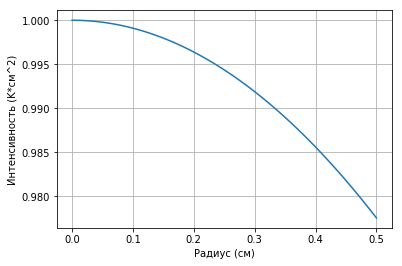

In [6]:
plt.plot(r_arr,bessel(mu1*r_arr/radius)) #нарисуем интенсивность
plt.ylabel('Интенсивность (K*см^2)')
plt.xlabel('Радиус (см)')
plt.grid(True) 
plt.show()

In [7]:
a_p = c/t+2*k/h**2+alpha/l
b_p = -2*k/h**2
def c_p(i):
    return -k/(2*h**2) + k/(2*h*i*h)
d_p = c/t + k/h**2 + alpha/l
def e_p(i):
    return -k/h**2 - k/(4*h*i*h)
f_p = -k/h**2
g_p = c/t + k/h**2 + alpha/l
def q_p(i):
    return beta/l*intensive(i)

In [8]:
a_q = c/tau - 2*k/h**2 - alpha/l
b_q = 2*k/h**2
def c_q(i):
    return k/(2*h**2) - k/(4*h*i*h)
d_q = c/tau - k/h**2 - alpha/l
def e_q(i):
    return k/(2*h**2) + k/(4*h*i*h)
f_q = k/h**2
g_q = c/tau - k/h**2 - alpha/l

In [9]:
P = np.zeros((num_i, num_i))
P[0,0] = a_p
P[0,1] = b_p
for i in range(1,num_i-1):  # по всем индексам кроме нулевого и последнего
    P[i,i-1] = c_p(i)
    P[i,i] = d_p
    P[i,i+1] = e_p(i)
P[-1,-2] = f_p
P[-1,-1] = g_p

In [10]:
Q = np.zeros((num_i, num_i))
Q[0,0] = a_q
Q[0,1] = b_q
for i in range(1,num_i-1):  # по всем индексам кроме нулевого и последнего
    Q[i,i-1] = c_q(i)
    Q[i,i] = d_q
    Q[i,i+1] = e_q(i)
Q[-1,-2] = f_q
Q[-1,-1] = g_q

In [11]:
# краевое условие
w[:,0] = 0 # при t = 0

In [12]:
q = np.zeros((1,num_i))
for i in range(num_i):
    q[0,i] = beta/l*intensive(i)
q.T.shape

(100, 1)

In [13]:
for m in range(0,num_m-1): # идем послойно, по времени
    right_column = (Q*w[:,m]+q).T
    w[:,m+1] = np.linalg.solve(P,right_column)[:,0]

In [14]:
v = w + u0

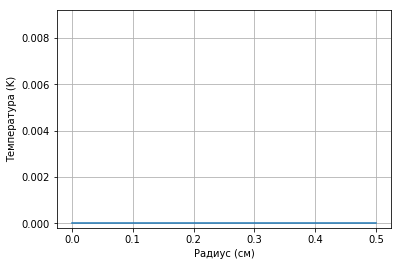

In [16]:
plt.plot(r_arr,v[:,0]) # распредление по радиусу в начальный момент времени
plt.ylim((-0.0002, 0.0092))
plt.ylabel('Температура (K)')
plt.xlabel('Радиус (см)')
plt.grid(True) 
plt.show()

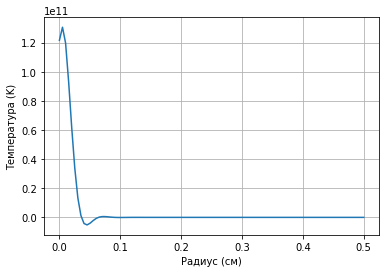

In [18]:
plt.plot(r_arr,v[:,1]) # распредление по радиусу во время второго отсчета по времени
#plt.ylim((-0.0002, 0.0084))
plt.ylabel('Температура (K)')
plt.xlabel('Радиус (см)')
plt.grid(True) 
plt.show()

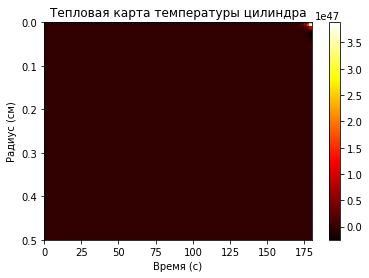

In [15]:
import matplotlib.cm as cmap
extent = [np.min(t_arr), np.max(t_arr), np.max(r_arr), np.min(r_arr)]
plt.imshow(v, cmap=cmap.hot, aspect='auto', extent=extent)
plt.title("Тепловая карта температуры цилиндра")
plt.ylabel('Радиус (см)')
plt.xlabel('Время (с)')
plt.colorbar()
plt.show()